In [1]:
!python3 -m pip install --user neo elephant viziphant

# SPADE tutorial
## Generate correlated data

In [2]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

In [3]:
spiketrains = elephant.spike_train_generation.compound_poisson_process(
   rate=5*pq.Hz, A=[0]+[0.98]+[0]*8+[0.02], t_stop=10*pq.s)
len(spiketrains)

10

In [4]:
for i in range(90):
    spiketrains.append(elephant.spike_train_generation.homogeneous_poisson_process(
        rate=5*pq.Hz, t_stop=10*pq.s))

In [9]:
print("spiketrain_0 type is", type(spiketrains[0]))
print("spiketrains_last type is", type(spiketrains[-1]))

spiketrain_0 type is <class 'neo.core.spiketrain.SpikeTrain'>
spiketrains_last type is <class 'neo.core.spiketrain.SpikeTrain'>


In [11]:
print(f"spiketrain_0 has {len(spiketrains[0])} spikes:")
print("  t_start:", spiketrains[0].t_start)
print("  t_stop:", spiketrains[0].t_stop)
print("  spike times:", spiketrains[0].times)

spiketrain_0 has 39 spikes:
  t_start: 0.0 s
  t_stop: 10.0 s
  spike times: [0.3428428  0.36964823 1.22303783 1.28863725 1.63905792 2.88270894
 3.03516076 3.03817857 3.41886987 3.46763254 3.83237276 3.85699453
 4.17892833 4.18912792 4.50264362 5.11709083 5.25194019 5.32478839
 6.39516735 6.50198542 6.92936517 6.98985003 7.10209661 7.15895706
 7.56589684 7.78118491 8.24170386 8.31116287 8.49874386 8.70570514
 8.91675734 8.97507227 9.03423901 9.03853449 9.15468654 9.39298729
 9.52941963 9.61571811 9.9134528 ] s


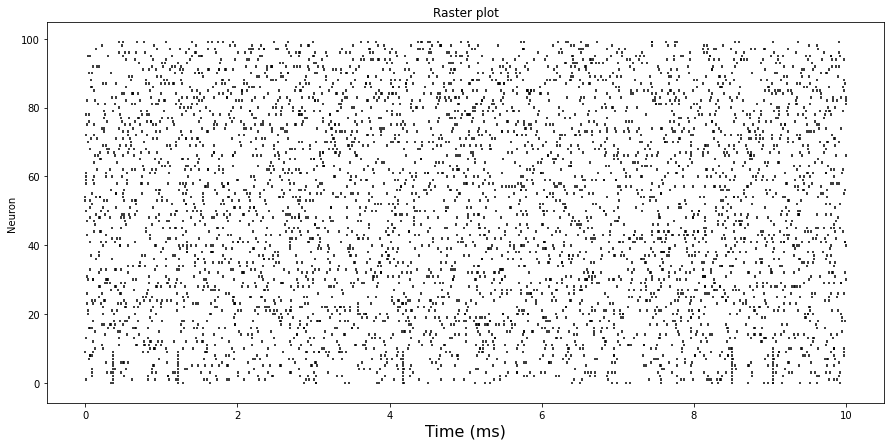

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.eventplot([spiketrains[i].magnitude for i in range(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

## Mining patterns with SPADE 

In [5]:
patterns = elephant.spade.spade(
    spiketrains=spiketrains, binsize=1*pq.ms, winlen=1, min_spikes=3,
    n_surr=100,dither=5*pq.ms,
    psr_param=[0,0,0],
    output_format='patterns')['patterns']

/usr/local/anaconda3/lib/python3.8/site-packages/elephant/spade.py:679: UserWarning: Optimized C implementation of FCA (fim.so/fim.pyd) not found in elephant/spade_src folder, or not compatible with this Python version. You are using the pure Python implementation of fast fca.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
patterns

In [ ]:
viziphant.patterns.plot_patterns(spiketrains, patterns)